In [5]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
import nbinteract
from scipy import stats

### The Central Limit Theorem ###
Very few of the data histograms that we have seen in this course have been bell shaped. When we have come across a bell shaped distribution, it has almost invariably been an empirical histogram of a statistic based on a random sample.

**The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.**

As we noted when we were studying Chebychev's bounds, results that can be applied to random samples *regardless of the distribution of the population* are very powerful, because in data science we rarely know the distribution of the population.

The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

### Proportion of Purple Flowers ###
Recall Mendel's probability model for the colors of the flowers of a species of pea plant. The model says that the flower colors of the plants are like draws made at random with replacement from {Purple, Purple, Purple, White}.

In a large sample of plants, about what proportion will have purple flowers? We would expect the answer to be about 0.75, the proportion purple in the model. And, because proportions are means, the Central Limit Theorem says that the distribution of the sample proportion of purple plants is roughly normal.

We can confirm this by simulation. Let's simulate the proportion of purple-flowered plants in a sample of 200 plants.

In [6]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

Color
Purple
Purple
Purple
White


In [7]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

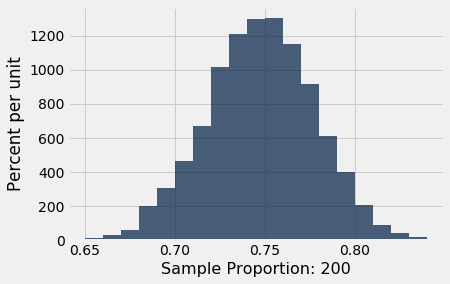

In [8]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

There's that normal curve again, as predicted by the Central Limit Theorem, centered at around 0.75 just as you would expect.

How would this distribution change if we increased the sample size? Let's run the code again with a sample size of 800, and collect the results of simulations in the same table in which we collected simulations based on a sample size of 200. We will keep the number of `repetitions` the same as before so that the two columns have the same length.

In [9]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

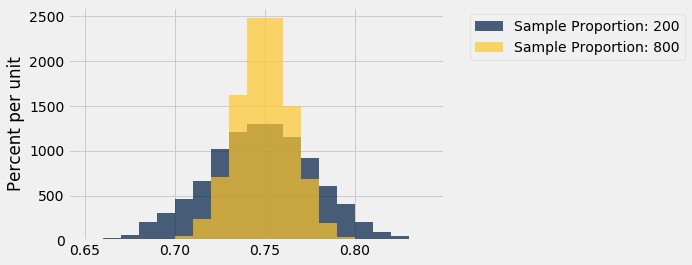

In [10]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

Both distributions are approximately normal but one is narrower than the other. The proportions based on a sample size of 800 are more tightly clustered around 0.75 than those from a sample size of 200. Increasing the sample size has decreased the variability in the sample proportion.


Try this out yourself!

In [15]:
def simulate_mendel_experiement(num_plants):
    props2 = make_array()
    for i in np.arange(repetitions):
        sample = model.sample(num_plants)
        new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
        props2 = np.append(props2, new_prop)
    return props2


nbinteract.hist(simulate_mendel_experiement, num_plants=(100,1000, 100), options={'xlim': (0.65, 0.9)})

A Jupyter Widget

A Jupyter Widget